In [80]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [81]:
#read data
from sklearn.datasets import load_boston
boston=load_boston()
print(boston.DESCR)
print(type(boston))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [82]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [83]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [84]:
print(boston.data.shape)

(506, 13)


<h2>Step1:Check data and statistics </h2>

In [85]:
df_boston= pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['Price'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [114]:
#check for null values
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [112]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<h2>Step 2:Feature Observation and assumptions </h2>

In [87]:
#Assumptions and hypothesis on the data
#There is a relation between Number of Rooms (RM), pupil-teacher ratio by town(PTRATIO),
# % lower status of the population(LSTAT)  and price of House

<h2>Step3: visualize relationship between features and target </h2>

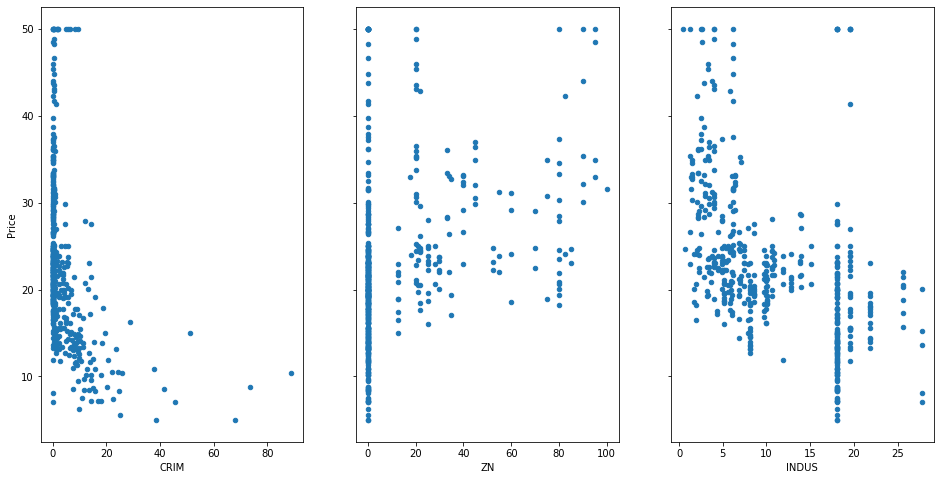

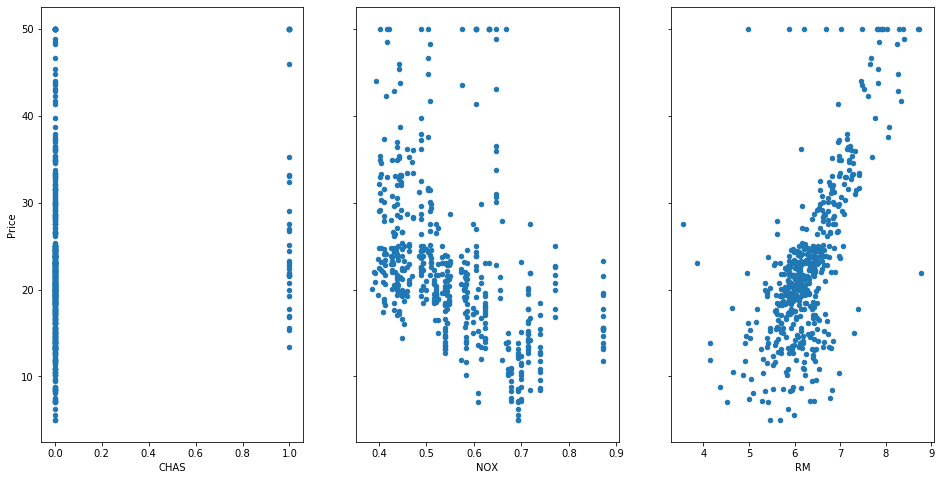

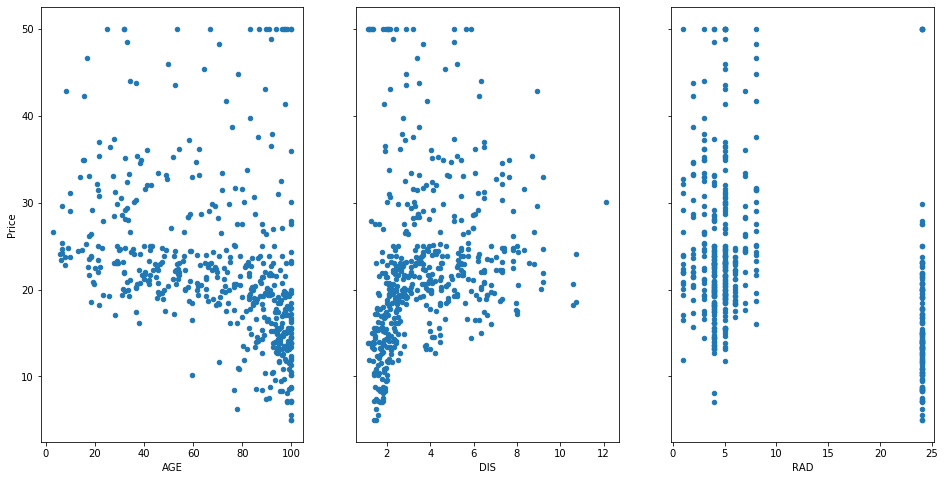

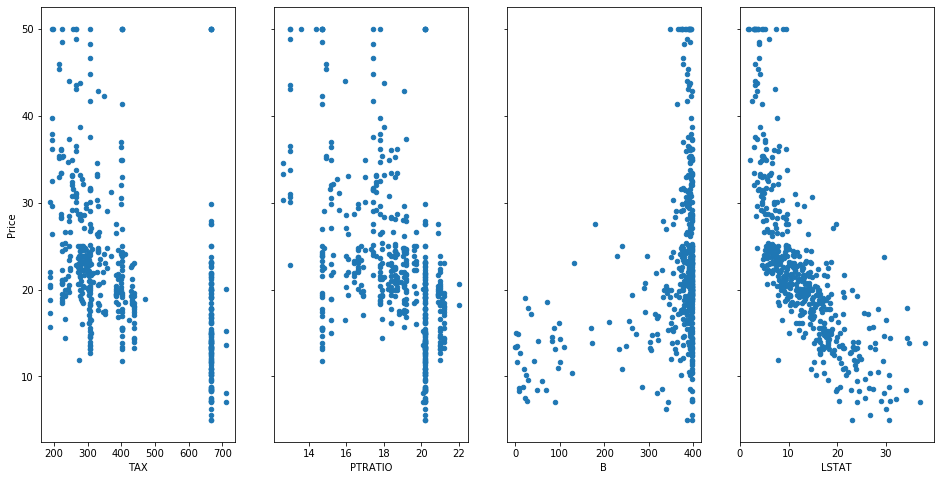

In [88]:
fig,axs=plt.subplots(1,3,sharey=True)
df_boston.plot(kind='scatter',x='CRIM',y='Price',ax=axs[0],figsize=(16,8))
df_boston.plot(kind='scatter',x='ZN',y='Price',ax=axs[1],figsize=(16,8))
df_boston.plot(kind='scatter',x='INDUS',y='Price',ax=axs[2],figsize=(16,8))


fig,axs=plt.subplots(1,3,sharey=True)
df_boston.plot(kind='scatter',x='CHAS',y='Price',ax=axs[0],figsize=(16,8))
df_boston.plot(kind='scatter',x='NOX',y='Price',ax=axs[1],figsize=(16,8))
df_boston.plot(kind='scatter',x='RM',y='Price',ax=axs[2],figsize=(16,8))

fig,axs=plt.subplots(1,3,sharey=True)
df_boston.plot(kind='scatter',x='AGE',y='Price',ax=axs[0],figsize=(16,8))
df_boston.plot(kind='scatter',x='DIS',y='Price',ax=axs[1],figsize=(16,8))
df_boston.plot(kind='scatter',x='RAD',y='Price',ax=axs[2],figsize=(16,8))

fig,axs=plt.subplots(1,4,sharey=True)
df_boston.plot(kind='scatter',x='TAX',y='Price',ax=axs[0],figsize=(16,8))
df_boston.plot(kind='scatter',x='PTRATIO',y='Price',ax=axs[1],figsize=(16,8))
df_boston.plot(kind='scatter',x='B',y='Price',ax=axs[2],figsize=(16,8))
df_boston.plot(kind='scatter',x='LSTAT',y='Price',ax=axs[3],figsize=(16,8))


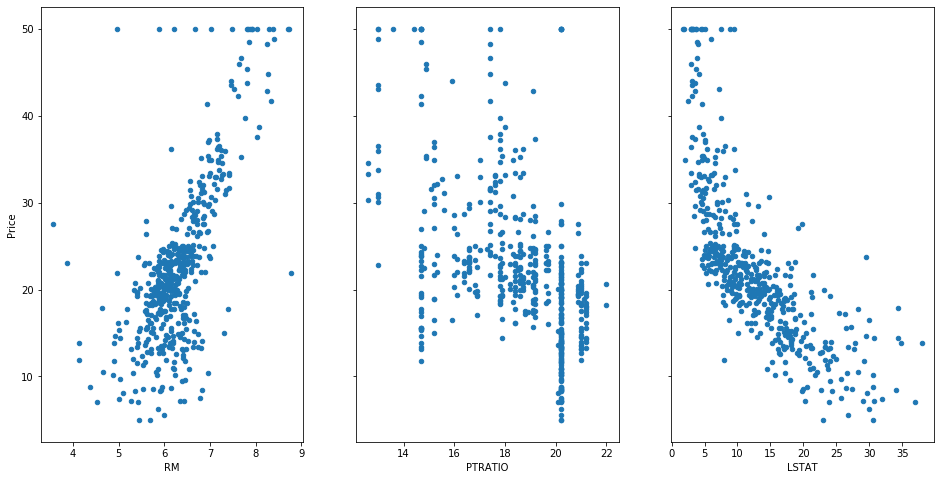

In [89]:
fig,axs=plt.subplots(1,3,sharey=True)
df_boston.plot(kind='scatter',x='RM',y='Price',ax=axs[0],figsize=(16,8))
df_boston.plot(kind='scatter',x='PTRATIO',y='Price',ax=axs[1],figsize=(16,8))
df_boston.plot(kind='scatter',x='LSTAT',y='Price',ax=axs[2],figsize=(16,8))

In [90]:
#Insight:
#We can spot a linear relationship between RM (Rooms) and Price of house

<h2>Linear Regression using one feature:RM based on above plots</h2>

In [105]:
#import necessary libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.formula.api as smf 
from math import sqrt

In [106]:
#Linear Regression
feature_cols=['RM']
X=df_boston[feature_cols]
y=df_boston.Price
x_train,x_test,y_train,y_test=train_test_split(X,y)
lm=LinearRegression()
lm.fit(x_train,y_train)
print(lm.intercept_,lm.coef_)

-34.45491061187397 [9.06910015]


In [107]:
predicted=lm.predict(x_test)
print(sqrt(mean_squared_error(y_test,predicted)))

7.55438152964107


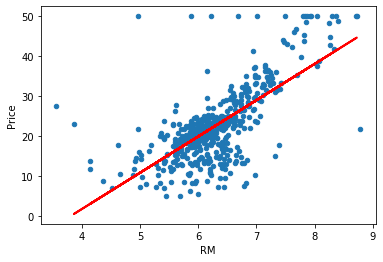

In [108]:
#plot least square line
df_boston.plot(kind='scatter',x='RM',y='Price')
plt.plot(x_test,predicted,c='red',linewidth=2)

In [109]:
#testing the model
#test the model for 10 uisng intercept and coefficient
#Actual:
-33.455228+8.84884743*12

72.73094115999999

In [110]:
x_new=pd.DataFrame({'RM':[12]})
x_new

,RM
0,12


In [111]:
lm.predict(x_new)

array([74.37429119])

In [96]:
#Hypothesis testing and P values: 

#using the null hypothesis lets assume there is no relationship between RM and price of House 
#Lets test this hypothesis. We shall reject the Null Hypothesis if 95% confidence inderval does not include 0

lm=smf.ols(formula='Price~RM',data=df_boston).fit()
print('Confidence Interval:')
print(lm.conf_int())
print('\nRSquared Value:')
print(lm.rsquared)
print('\nSummary Table:')
print(lm.summary())

Confidence Interval:
                   0          1
Intercept -39.876641 -29.464601
RM          8.278855   9.925363

RSquared Value:
0.48352545599133423

Summary Table:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 27 Sep 2019   Prob (F-statistic):           2.49e-74
Time:                        14:09:20   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err        

<h2>Check if MultiLinear Regression model is a better fit</h2>

In [97]:
#Linear Regression

feature_cols=['RM','PTRATIO','LSTAT']
X=df_boston[feature_cols]
y=df_boston.Price
x_train,x_test,y_train,y_test=train_test_split(X,y)
lm=LinearRegression()
lm.fit(x_train,y_train)
print(lm.intercept_,lm.coef_)

15.69139494536945 [ 5.17750515 -1.05961613 -0.49993016]


In [98]:
predicted=lm.predict(x_test)
print(sqrt(mean_squared_error(y_test,predicted)))

6.651863732552622


In [99]:
#Insight: 
#looking at the above values we can say that
#coefficient: a unit increase in ZN increases the house price by 4.72

In [101]:
#Hypothesis testing and P values: 

#using the null hypothesis lets assume there is no relationship between features and price of House 
#Lets test this hypothesis. We shall reject the Null Hypothesis if 95% confidence inderval does not include 0

lm=smf.ols(formula='Price~RM+PTRATIO+LSTAT',data=df_boston).fit()
print('Confidence Interval:')
print(lm.conf_int())
print('\nRSquared Value:')
print(lm.rsquared)
print('\nSummary Table:')
print(lm.summary())

Confidence Interval:
                   0          1
Intercept  10.878841  26.255382
RM          3.678711   5.352131
PTRATIO    -1.161877  -0.699568
LSTAT      -0.654775  -0.488836

RSquared Value:
0.678624160161311

Summary Table:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          2.69e-123
Time:                        14:09:35   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                    

<h2>Ridge, Lasso, ElasticNet Regression Model comparision</h2>

In [115]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=0.001,normalize=True)
ridgereg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_train,ridgereg.predict(x_train))))
print(sqrt(mean_squared_error(y_test,ridgereg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(ridgereg.score(x_test,y_test)))

6.2520661751435
7.554463404192805
R2 Value/Coefficient of determination:0.44746874237840484


In [116]:
from sklearn.linear_model import Lasso
lassoreg=Ridge(alpha=0.001,normalize=True)
lassoreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_train,lassoreg.predict(x_train))))
print(sqrt(mean_squared_error(y_test,lassoreg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(lassoreg.score(x_test,y_test)))

6.2520661751435
7.554463404192805
R2 Value/Coefficient of determination:0.44746874237840484


In [117]:
from sklearn.linear_model import ElasticNet
elasticreg=Ridge(alpha=0.001,normalize=True)
elasticreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_train,elasticreg.predict(x_train))))
print(sqrt(mean_squared_error(y_test,elasticreg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(elasticreg.score(x_test,y_test)))

6.2520661751435
7.554463404192805
R2 Value/Coefficient of determination:0.44746874237840484
